In [20]:
import numpy as np
import pandas as pd
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, ConfusionMatrixDisplay, precision_score
import seaborn as sns
!pip install kmodes
from kmodes.kmodes import KModes
from datetime import datetime

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
dataset = pd.read_csv('C:/Users/marci/Documents/NCI/ML/cardio_train.csv', sep=';')
pd.set_option('display.max_columns', None)
print(dataset.count().unique())
dataset.head()

[70000]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [23]:
# checking for missing values
print(dataset.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [24]:
# droping id column
dataset = dataset.drop('id', axis=1)

In [25]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Removing outliers, , we can see that max/low height, weight, ap_hi and ap_lo are looks like out of bounds, we will remove everything that is outside of range of 3% to 97% 
dataset.drop(dataset[(dataset['height'] > dataset['height'].quantile(0.97)) | (dataset['height'] < dataset['height'].quantile(0.03))].index,inplace=True)
dataset.drop(dataset[(dataset['weight'] > dataset['weight'].quantile(0.97)) | (dataset['weight'] < dataset['weight'].quantile(0.03))].index,inplace=True)
dataset.drop(dataset[(dataset['ap_hi'] > dataset['ap_hi'].quantile(0.97)) | (dataset['ap_hi'] < dataset['ap_hi'].quantile(0.03))].index,inplace=True)
dataset.drop(dataset[(dataset['ap_lo'] > dataset['ap_lo'].quantile(0.97)) | (dataset['ap_lo'] < dataset['ap_lo'].quantile(0.03))].index,inplace=True)
len(dataset)

57828

In [27]:
#after removing outliers
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000
mean,19491.173739,1.350194,164.620340,73.658834,126.236425,81.682334,1.354119,1.221605,0.085581,0.051947,0.803676,0.494864
std,2452.047137,0.477035,6.821789,11.426754,13.544854,7.505061,0.673139,0.569349,0.279747,0.221922,0.397220,0.499978
min,10859.000000,1.000000,150.000000,53.000000,100.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17732.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19716.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21333.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,180.000000,105.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# converting age from days to years
dataset['age'] = (dataset['age'] / 365).round().astype('int')

print(dataset.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
5   60       1     151    67.0    120     80            2     2      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
5       0       0  


In [29]:
# categorizing age
# bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

# bin in  5 years span
dataset['age_group'] = pd.cut(dataset['age'], bins=7, labels=range(7), include_lowest=True,right=True)
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
5,60,1,151,67.0,120,80,2,2,0,0,0,0,5


In [30]:
# we will add additional column BMI which is Body Mass Index insted of feauters waight and haight
dataset['bmi'] = dataset['weight']/((dataset['height']/100)**2)
dataset.head()

bmiMin = int(dataset['bmi'].min())
bmiMax = int(dataset['bmi'].max())

print(bmiMin, bmiMax)

dataset['bmi'] = pd.cut(dataset['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

16 46


In [31]:
# we will add additional column MAP which is Mean Arterial Pressure
dataset['map'] = ((2* dataset['ap_lo']) + dataset['ap_hi']) / 3

mapMin = int(dataset['map'].min())
mapMax = int(dataset['map'].max())

print(mapMin, mapMax)

dataset['map'] = pd.cut(dataset['map'], bins=6, labels=range(6), right=True, include_lowest=True)

dataset.head()

77 120


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,1
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,5
5,60,1,151,67.0,120,80,2,2,0,0,0,0,5,2,2


In [32]:
# as we added 3 columns Age categories, BMI and MAP, we will drop coresponding columns
dataset=dataset.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)

dataset.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,2,1,1,0,0,1,0,3,1,1
1,1,3,1,0,0,1,1,4,3,4
2,1,3,1,0,0,0,1,4,1,1
3,2,1,1,0,0,1,1,3,2,5
5,1,2,2,0,0,0,0,5,2,2


In [33]:
# doing label encoder
label_encoder = preprocessing.LabelEncoder()
dataset = dataset.apply(label_encoder.fit_transform)
dataset.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
count,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000,57828.000000
mean,0.350194,0.354119,0.221605,0.085581,0.051947,0.803676,0.494864,4.054766,1.656066,2.291987
std,0.477035,0.673139,0.569349,0.279747,0.221922,0.397220,0.499978,1.372208,0.902424,1.299555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,3.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,5.000000


In [34]:
# Clustering data for better performance, we will use K-modes as it is clustering algorithm for categorical data
cost = []
number_of_clusters = range(1,5) # 1 to 4
for i in list(number_of_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 5, verbose=0,random_state=1)
    kmode.fit_predict(dataset)
    cost.append(kmode.cost_)

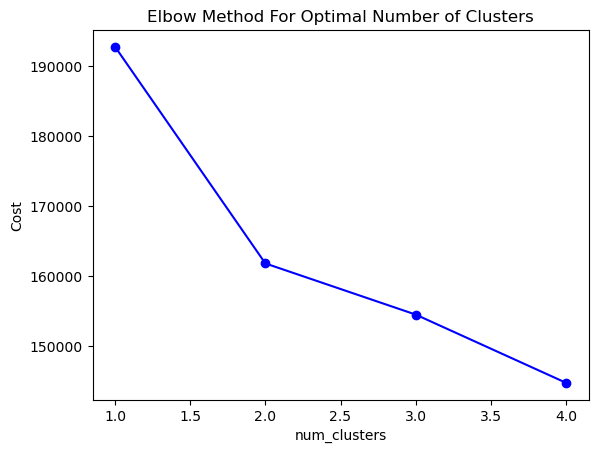

In [35]:
# clusters graph
plt.plot(number_of_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [36]:
# we see elbow at 2, we building K-modes model
km = KModes(n_clusters=2, init = "Huang", n_init = 5,random_state=1)
clusters = km.fit_predict(dataset)
clusters

array([1, 0, 1, ..., 1, 0, 1], dtype=uint16)

In [37]:
dataset.insert(0,"clusters",clusters,True)

dataset.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,1,1,0,0,0,0,1,0,3,1,1
1,0,0,2,0,0,0,1,1,4,3,4
2,1,0,2,0,0,0,0,1,4,1,1
3,0,1,0,0,0,0,1,1,3,2,5
5,0,0,1,1,0,0,0,0,5,2,2


In [38]:
# splitting data
x = dataset.drop(['cardio'], axis=1)
y = dataset['cardio']

x.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,age_group,bmi,map
0,1,1,0,0,0,0,1,3,1,1
1,0,0,2,0,0,0,1,4,3,4
2,1,0,2,0,0,0,0,4,1,1
3,0,1,0,0,0,0,1,3,2,5
5,0,0,1,1,0,0,0,5,2,2


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.20, random_state=1)

Sklearn Precision =  0.8696534234995773
Duration: 0:00:00.883841
R2 score: 0.5031130719463623
Accuracy Random Forest: 87.58


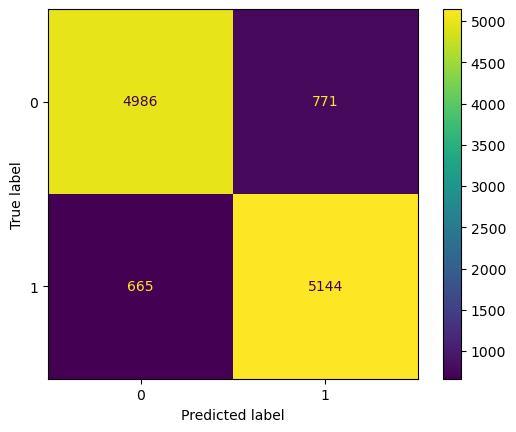

In [40]:
# Random Forest
def RandomForest_fun():
    start_time = datetime.now()
    RandomForestModel = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=1, random_state=1)
    RandomForestModel.fit(x_train, y_train)
    RandomForestModel_pred = RandomForestModel.predict(x_test)
    RandomForestModel_accuracy = metrics.accuracy_score(y_test, RandomForestModel_pred)*100
    end_time = datetime.now()
    cm = confusion_matrix(y_test, RandomForestModel_pred, labels= RandomForestModel.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RandomForestModel.classes_)
    disp.plot()
    sklearn_precision = precision_score(y_test,RandomForestModel_pred)
    print("Sklearn Precision = ",sklearn_precision)
    print('Duration: {}'.format(end_time - start_time))
    print("R2 score: {0}".format(r2_score(RandomForestModel_pred, y_test)))
    return print(f"Accuracy Random Forest: {RandomForestModel_accuracy:.2f}")
    
    
RandomForest_fun()

Sklearn Precision =  0.7966315126711789
Duration: 0:00:00.044430
R2 score: 0.2875624932269095
Accuracy Logistic Regresion: 82.36


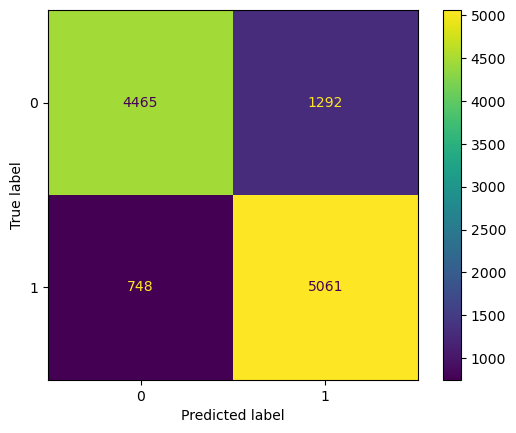

In [42]:
# Logistic Regression
def LogisticRegresion_fun():
    start_time = datetime.now()
    LogisticRegresionModel = LogisticRegression(max_iter = 1000)
    LogisticRegresionModel.fit(x_train, y_train)
    LogisticRegresionModel_pred = LogisticRegresionModel.predict(x_test)
    LogisticRegresionModel_accuracy = metrics.accuracy_score(y_test, LogisticRegresionModel_pred)*100
    end_time = datetime.now()
    cm = confusion_matrix(y_test, LogisticRegresionModel_pred, labels= LogisticRegresionModel.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LogisticRegresionModel.classes_)
    disp.plot()
    sklearn_precision = precision_score(y_test,LogisticRegresionModel_pred)
    print("Sklearn Precision = ",sklearn_precision)
    print('Duration: {}'.format(end_time - start_time))
    print("R2 score: {0}".format(r2_score(LogisticRegresionModel_pred, y_test)))
    return print(f"Accuracy Logistic Regresion: {LogisticRegresionModel_accuracy:.2f}")
    
    
LogisticRegresion_fun()

Sklearn Precision =  0.8373166309543432
Duration: 0:00:00.655591
R2 score: 0.40510166030157346
Accuracy KNeighbors: 85.16


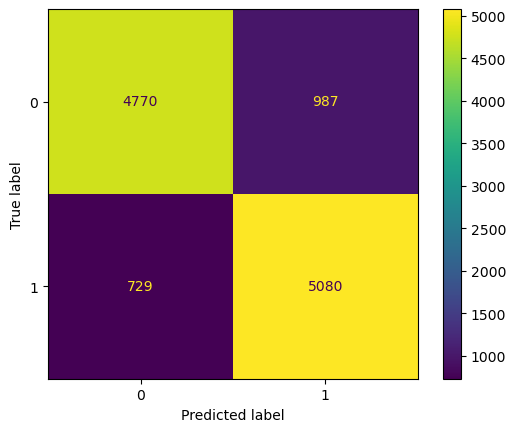

In [44]:
# KNeighbors
def KNeighbors_fun():
    start_time = datetime.now()
    KNeighborsModel = KNeighborsClassifier()
    KNeighborsModel.fit(x_train, y_train)
    KNeighborsModel_pred = KNeighborsModel.predict(x_test)
    KNeighborsModel_accuracy = metrics.accuracy_score(y_test, KNeighborsModel_pred)*100
    end_time = datetime.now()
    cm = confusion_matrix(y_test, KNeighborsModel_pred, labels= KNeighborsModel.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNeighborsModel.classes_)
    disp.plot()
    sklearn_precision = precision_score(y_test,KNeighborsModel_pred)
    print("Sklearn Precision = ",sklearn_precision)
    print('Duration: {}'.format(end_time - start_time))
    print("R2 score: {0}".format(r2_score(KNeighborsModel_pred, y_test)))
    return print(f"Accuracy KNeighbors: {KNeighborsModel_accuracy:.2f}")
    
    
KNeighbors_fun()
